# 딥러닝 최적 모델 학습 

## 오차역전파법

### 1. 오차역전파법

- 순전파 : 입력층 -> 은닉층 -> 출력층
    - 출력값 : $\hat{y}$
    
- 오차 계산 : 실제값 y와 예측값 $\hat{y}$ 의 차이를 손실함수로 계산

- 역전파 : 출력층의 오차를 시작으로해서 각 층의 가중치에 대해 기울기를 계산

    - **가중치 업데이트** : w(가중치) = w - learning_rate * 기울기

    - **역전파의 목적** : 출력 결과가 틀렸다 -> 이 결과에 가장 큰 영향을 준 가중치를 더 많이 수정하면 되겠다.

    - 출력층 -> 은닉층 -> 입력층 방향으로 순전파의 역순으로 돈다.

    - 그러면서 이 가중치는 오차에 얼마나 영향을 미쳤는가?(기울기)를 계산한다.


경사하강법 말고 쓸수있는 최적화 방법
- Adam

**오차역전파법의 핵심 수식**

오차역전파법은 **연쇄법칙(Chain Rule)**을 이용하여 기울기를 전파한다. 가중치 **W**를 학습시키는 과정은 다음과 같다.

1. **손실 함수 L**에 대한 출력층 a의 미분: $\frac{\partial L}{\partial a} = \text{출력층 오차}$  -> 출력층의 활성화 값 a가 손실에 얼마나 영향을 주는지 = 출력층 오차
2. **출력층에서 은닉층으로 전파**: $\frac{\partial L}{\partial W} = \frac{\partial L}{\partial a} \times \frac{\partial a}{\partial W}$    ->  출력오차 * 가중치 출력에 미치는 영향 = 가중치가 얼마나 바뀌냐에 따라 손실이 얼마나 바뀔지 계산한다.
3. **경사하강법을 이용한 가중치 업데이트**: $W = W - \eta \cdot \frac{\partial L}{\partial W}$
    - $\eta$ = 학습률(Learning Rate) -> 가중치 = 가중치 - 학습률 * 가중치  가 출력에 미치는 영향

- 경사하강법 대신 최적화 함수 : SGD, Adam, AdamW, ... => Optimizer 최적화 함수가 담당

In [1]:
import numpy as np

# 활성화 함수 (시그모이드)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 활성화 함수의 미분
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# 입력 데이터
x = np.array([0.5, 0.8])
# 실제 출력값
y_true = np.array([1])

# 가중치 초기화 : 입력 특성별 가중치
w = np.array([0.2, 0.4])

# 순전파
z = np.dot(x, w)  # 선형 변환 (내적 계산)
a = sigmoid(z)  # 활성화 함수 적용

# 오차 계산 -  미분시에 0.5를 곱한 값을 사용해 깔끔하게 2를 이용해 약분시키려고 (기울기 계산시에 단순화 작업)
loss = 0.5 * (y_true - a) ** 2  # 평균 제곱 오차

# 역전파 (기울기 계산)
delta = (a - y_true) * sigmoid_derivative(z)  # 출력층 오차(출력층에서 나온값(a) - 실제값(y_true)) * 활성화함수 미분
grad_w = delta * x  # 연쇄법칙 적용 : 가중치에 대한 기울기 계산

# 가중치 업데이트
learning_rate = 0.1
w -= learning_rate * grad_w # w - learning_rate * 기울기 : 경사하강법으로 가중치 갱신 

print("업데이트된 가중치:", w)

업데이트된 가중치: [0.20474415 0.40759064]


### 2. 국소적 계산

- 총 결과값을 1로 두는 이유가 기여도 때문 ?

- 해당기여도 / 최종기여도

In [2]:
# 국소적 계산 코드 구현
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 입력 데이터
x = np.array([0.5, 0.8])
# 가중치
w = np.array([[0.1, 0.3],  # 입력 1이 은닉 노드들로 가는 가중치
              [0.2, 0.4]])    # 입력 2이 은닉 노드들로 가는 가중치
# 편향
b = np.array([0.1, 0.2])    # 각 은닉 노드에 더해지는 편향값

# x @ w (내적계산) shape (n,) * (n,m) = (m,) : (2,) * (2,2) = (2,) 

# 은닉층 계산 (국소적 계산)
z = np.dot(x, w) + b    # 입력과 가중치 선형 결합 (내적 계산) + 편향  
a = sigmoid(z)

print("은닉층 출력:", a)

은닉층 출력: [0.57688526 0.66150316]


## 3. 연쇄법칙과 계산 그래프

In [3]:
# 순전파 & 역전파 기울기 계산
import numpy as np

def forward(x):
    y = x ** 2  # 예제 함수: y = x^2
    z = 2 * y   # z = 2y
    return z

def backward(xㅈ):
    dy_dx = 2 * x  # y = x^2의 미분 (dy/dx)
    dz_dy = 2      # z = 2y의 미분  (dz/dy)
    dz_dx = dz_dy * dy_dx  # 연쇄법칙 적용 : dz/dx = dz/dy * dy/dx
    return dz_dx    # 최종 기울기

x = 3.0
print("순전파 결과:", forward(x))   # z = 2 * (x^2)
print("역전파 결과 (기울기):", backward(x)) # 입력 x에 대한 z의 기울기

순전파 결과: 18.0
역전파 결과 (기울기): 12.0


#### 연쇄법칙

1. 함수 $y = 2x^2$  

2. 순전파  
    x=3  
$z = 2 * x^2 = 18$  

3. 역전파   : $\frac{dz}{dx}  = \frac{dz}{dy} \cdot \frac{dy}{dx}  = 2 \cdot (2x) = 12$

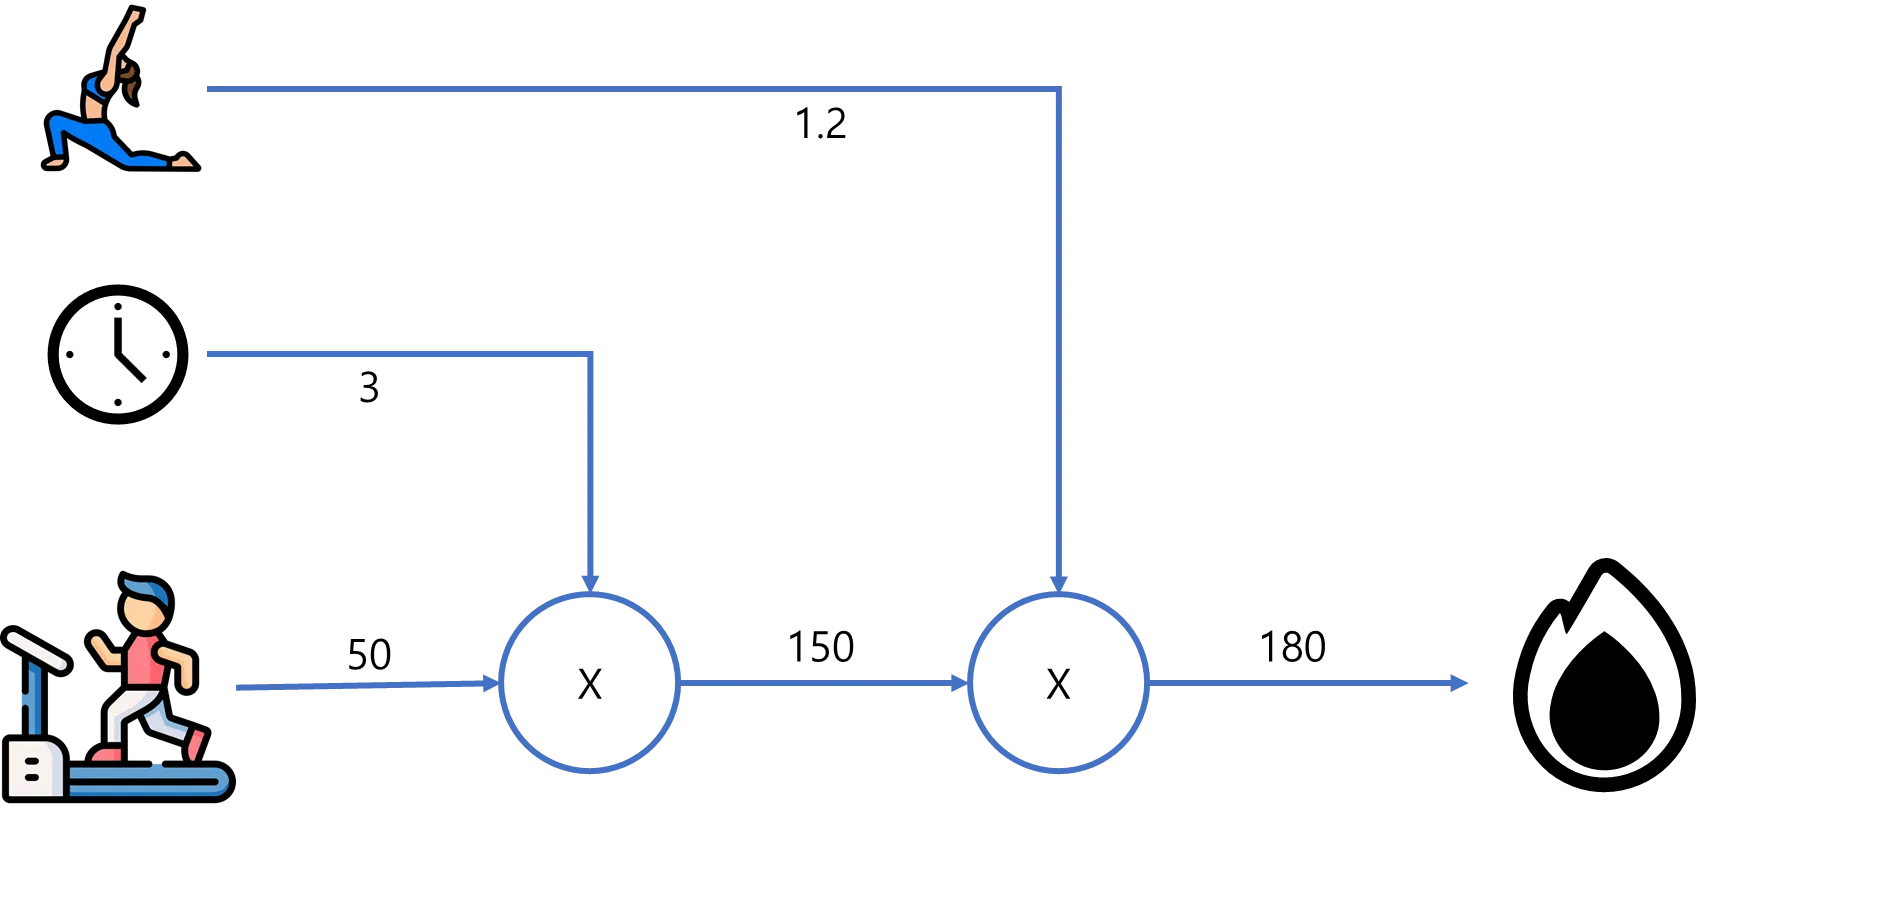

## 연쇄법칙 계산 그래프 - 계산 그래프 2번째 이미지

#### - 순전파 

트레밀 입력 : a = 50

시계 입력 : b = 3

요가 입력 : c = 1.2

첫번쨰 곱셈 노드 : y    
$ y = a * b = 50 * 3 = 150 $  
$ z = y * c = 150 * 1.2 = 180 $

### - 역전파 
#### z = u x v

#### $ u = \frac {\partial z} {\partial x}  $
#### $ v = \frac {\partial z} {\partial u}  $

=> 한쪽으로 기울기 보낼때 반대쪽 값이 곱해져서 간다.

##### 최종 출력에서 시작하는 기울기 $\frac {dz}{dz} = 1$

#### - 두번쨰 곱셈 노드 : $ z = y * c $
- $ \frac {\partial z} {\partial y} = c = 1.2 $
- $ \frac {\partial z} {\partial c} = y = 150 $
- 따라서
- $ \frac {\partial z} {\partial y} = 1 * 1.2 = 1.2 $
- $ \frac {\partial z} {\partial c} = 1 * 150 = 150       (요가의 기울기) $ 

- 첫번째 곱셈 노드 : $ y = a * b $
    - $ 위에서 내려온  \frac {\partial z} {\partial y} = c = 1.2 $
    - $ \frac {\partial y} {\partial a} = b = 3 $
    - $ \frac {\partial y} {\partial b} = a = 50 $

- 따라서 체인룰로 
    - $ \frac {\partial y} {\partial a} = \frac {\partial z} {\partial y} \cdot \frac {\partial y} {\partial a} = 1.2 * 3 = 3.6 (트레드밀 기울기)$

    - $ \frac {\partial y} {\partial b} = \frac {\partial z} {\partial y} \cdot \frac {\partial y} {\partial b} = 1.2 * 50 = 60  (시간의 기울기) $

- 결론적으로   
    - 트레드밀(50) 기울기 : $\frac {\partial z} {\partial a} = 3.6 $
        - 이 말은 트레드밀을 1만큼 늘리면 최종값 z 가 3.6만큼 증가
    - 시간(3) 기울기 : $\frac {\partial z} {\partial b} = 60 $
        - 이 말은 시간을 1만큼 늘리면 최종값 z 가 60만큼 증가
    - 요가(1.2) 기울기 : $\frac {\partial z} {\partial c} = 150 $
        - 이 말은 요가를 1만큼 늘리면 최종값 z 가 150만큼 증가

=> 곱셈 노드의 역전파는 "반대편의 값이 곱해진다.

In [4]:
# 기울기 검증
import numpy as np

def f(x):
    return x**2  # 예제 함수: y = x^2

# 수치 미분
def numerical_gradient(f, x): 
    h = 1e-4  # 작은 값
    return (f(x + h) - f(x - h)) / (2 * h)  # 중심 차분법 사용

def analytical_gradient(x):
    return 2 * x  # y = x^2의 미분 결과

x = 3.0
num_grad = numerical_gradient(f, x) # 수치미분
ana_grad = analytical_gradient(x)   # 자동미분

print("수치 미분 결과:", num_grad)
print("오차역전파법 결과:", ana_grad)
print("차이:", abs(num_grad - ana_grad))

수치 미분 결과: 6.000000000012662
오차역전파법 결과: 6.0
차이: 1.2661871551244985e-11


차이: 1.2661871551244985e-11  
-> 차이가 작으면(ex. 0.0000000001) 거의 같은 결과  
-> 차이가 크면 로직상에 문제가 발생했다 (거의 대부분 차원문제(차원 불일치 or 브로드캐스팅))  